# Listings

In [1]:
import pandas as pd
import numpy as np

listing = pd.read_csv('listings.csv')

print(listing.shape)
pd.concat([listing.head(), listing.tail()])

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,20160104002432,2016-01-04,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


First, let's fix the price variable.

In [2]:
listing['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [3]:
listing["price"] = listing["price"].map(lambda p: int(p[1:-3].replace(",", "")))
listing["price"]

0        85
1       150
2       975
3       100
4       450
       ... 
3813    359
3814     79
3815     93
3816     99
3817     87
Name: price, Length: 3818, dtype: int64

In [4]:
listing["price"].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='price'>

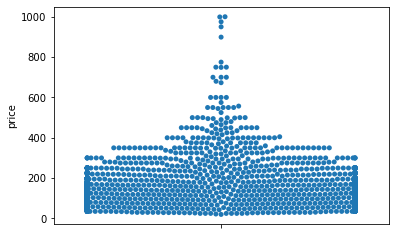

In [5]:
import seaborn as sns
%matplotlib inline

sns.swarmplot(y = listing["price"])

# Business Questions

### 1. How is the distribution of listings price across different neighborhoods in Seattle?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86]),
 [Text(0, 0, 'Briarcliff'),
  Text(1, 0, 'Pioneer Square'),
  Text(2, 0, 'Westlake'),
  Text(3, 0, 'Industrial District'),
  Text(4, 0, 'Southeast Magnolia'),
  Text(5, 0, 'Central Business District'),
  Text(6, 0, 'Belltown'),
  Text(7, 0, 'Pike-Market'),
  Text(8, 0, 'Portage Bay'),
  Text(9, 0, 'Pinehurst'),
  Text(10, 0, 'West Queen Anne'),
  Text(11, 0, 'Windermere'),
  Text(12, 0, 'First Hill'),
  Text(13, 0, 'Alki'),
  Text(14, 0, 'Montlake'),
  Text(15, 0, 'East Queen Anne'),
  Text(16, 0, 'Madrona'),
  Text(17, 0, 'View Ridge'),
  Text(18, 0, 'Lawton Park'),
  Text(19, 0, 'Stevens'),
  

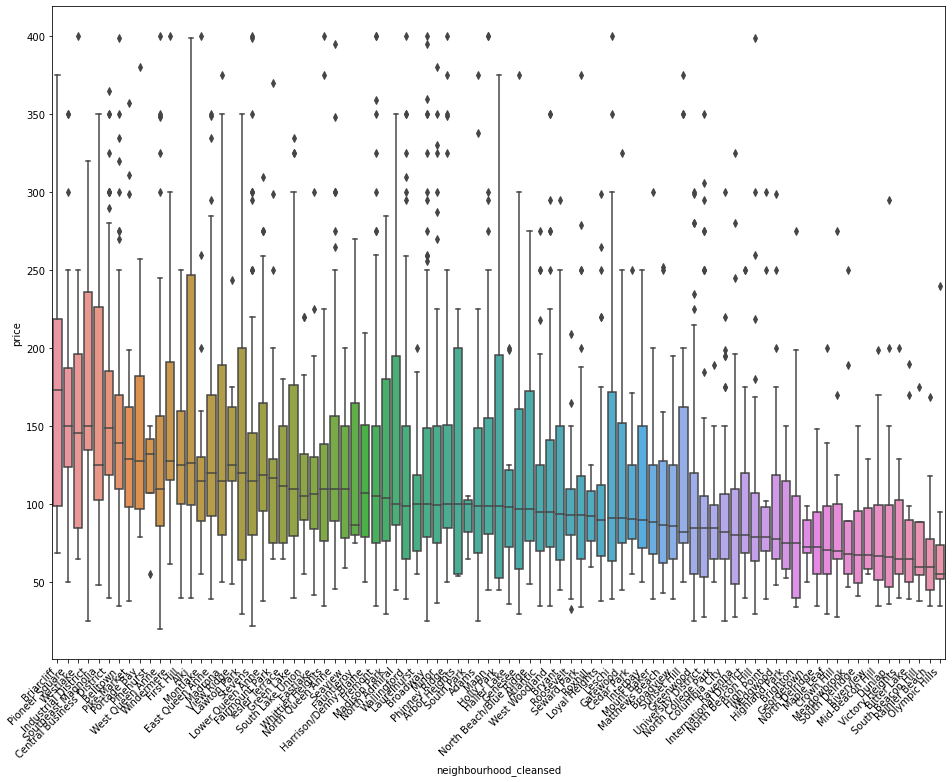

In [6]:
import matplotlib.pyplot as plt

sort_order = (listing
              .groupby('neighbourhood_cleansed')['price']
              .median()
              .sort_values(ascending = False)
              .index
             )

plt.figure(figsize = (16, 12))
sns.boxplot(y = 'price', x = 'neighbourhood_cleansed', data = listing.query('price <= 400'), order = sort_order)
plt.xticks(rotation = 45, ha = 'right')

In [7]:
listing.groupby('neighbourhood_cleansed')['price'].median().describe()

count     87.000000
mean     100.137931
std       24.730018
min       55.500000
25%       83.750000
50%       99.000000
75%      114.500000
max      173.500000
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

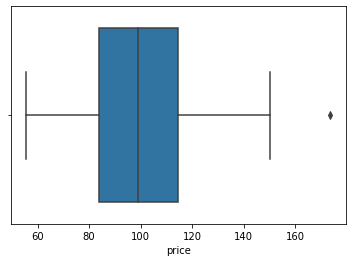

In [8]:
sns.boxplot(listing.groupby('neighbourhood_cleansed')['price'].median())

As we can see above, Q1 and Q3 (50% of the neighborhoods) of the median is between \\$83.75 and \\$114.50.

### 2. How different is the price between superhost listings and non-superhost listings in Seattle?

<AxesSubplot:xlabel='host_is_superhost', ylabel='price'>

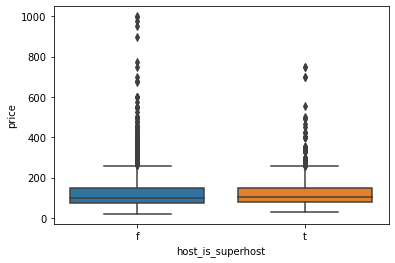

In [9]:
sns.boxplot(y = 'price', x = 'host_is_superhost', data = listing)

In [10]:
listing[listing["host_is_superhost"] == "t"]["price"].describe()

count    778.000000
mean     130.140103
std       87.528320
min       30.000000
25%       79.250000
50%      103.000000
75%      150.000000
max      750.000000
Name: price, dtype: float64

In [11]:
listing[listing["host_is_superhost"] == "f"]["price"].describe()

count    3038.000000
mean      127.391376
std        90.940554
min        20.000000
25%        74.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

Anyone would expect that most superhost listings would be more expensive than most non-superhost ones, but turns out in Seattle, the price distributions look quite similar (regardless of the other variables).

### 3. What kind of listings has the highest and lowest prices?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Boat'),
  Text(1, 0, 'Condominium'),
  Text(2, 0, 'Apartment'),
  Text(3, 0, 'Loft'),
  Text(4, 0, 'Yurt'),
  Text(5, 0, 'Bed & Breakfast'),
  Text(6, 0, 'Chalet'),
  Text(7, 0, 'Townhouse'),
  Text(8, 0, 'Bungalow'),
  Text(9, 0, 'Cabin'),
  Text(10, 0, 'House'),
  Text(11, 0, 'Other'),
  Text(12, 0, 'Camper/RV'),
  Text(13, 0, 'Tent'),
  Text(14, 0, 'Treehouse'),
  Text(15, 0, 'Dorm')])

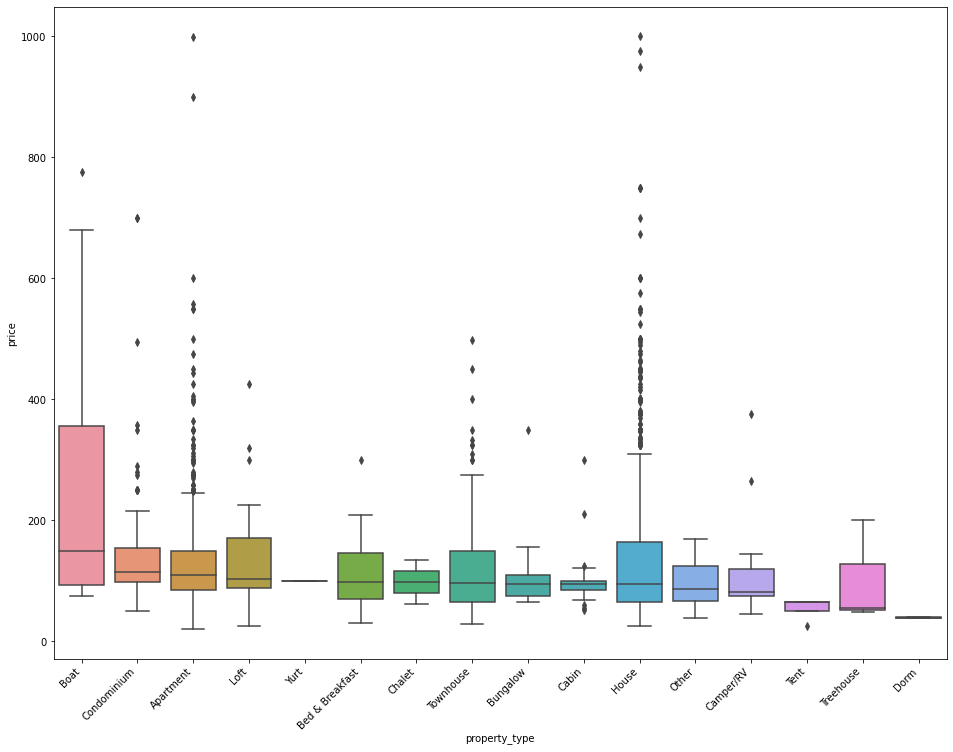

In [12]:
sort_order = (listing
              .groupby('property_type')['price']
              .median()
              .sort_values(ascending = False)
              .index
             )
plt.figure(figsize = (16, 12))
sns.boxplot(y = 'price', x = 'property_type', data = listing, order = sort_order)
plt.xticks(rotation = 45, ha = 'right')

In terms of `property_type`, we can see that `Boat` has the highest distribution of prices, and `Dorm` has the lowest one.

<AxesSubplot:xlabel='room_type', ylabel='price'>

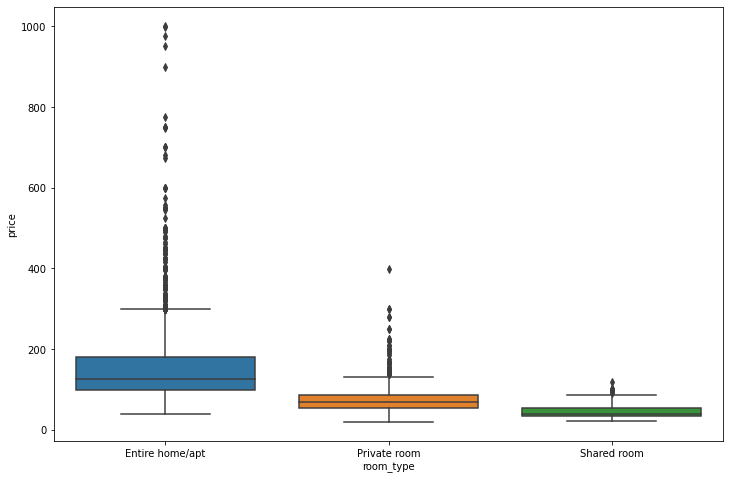

In [13]:
sort_order = (listing
              .groupby('room_type')['price']
              .median()
              .sort_values(ascending = False)
              .index
             )
plt.figure(figsize = (12, 8))
sns.boxplot(y = 'price', x = 'room_type', data = listing, order = sort_order)

In terms of `room_type`, we can see that `Entire home/apt` has the highest distribution of prices, and `Shared room` has the lowest one.

<AxesSubplot:xlabel='bed_type', ylabel='price'>

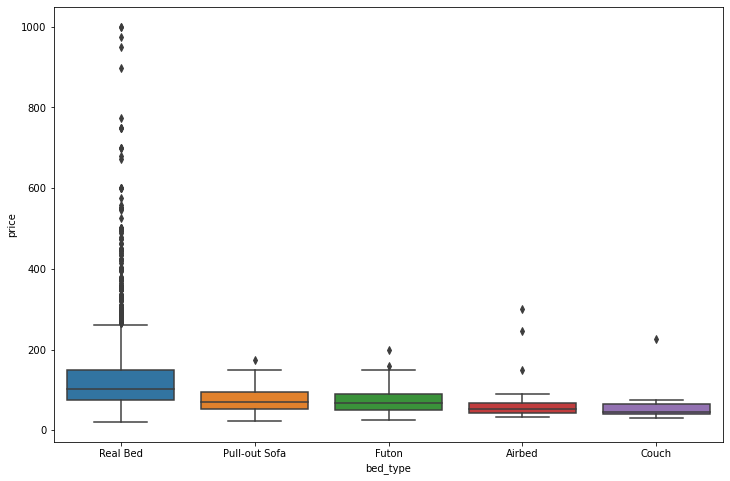

In [14]:
sort_order = (listing
              .groupby('bed_type')['price']
              .median()
              .sort_values(ascending = False)
              .index
             )
plt.figure(figsize = (12, 8))
sns.boxplot(y = 'price', x = 'bed_type', data = listing, order = sort_order)

In terms of `bed_type`, we can see that `Real Bed` has the highest distribution of prices, and `Couch` has the lowest one.

### 4. How many rooms do most listings have and which ones are the most pricey?

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

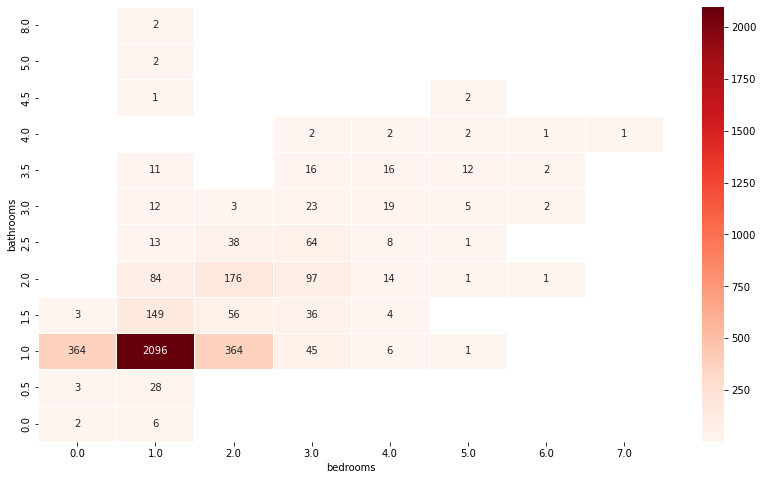

In [15]:
plt.figure(figsize = (14, 8))
sns.heatmap(listing
            .groupby(['bathrooms', 'bedrooms'])
            .count()['price']
            .reset_index()
            .pivot('bathrooms', 'bedrooms', 'price')
            .sort_index(ascending = False), 
            cmap = 'Reds', 
            fmt = '.0f', 
            annot = True, 
            linewidths = 0.5)

We can see that most listings have 1 bedroom and 1 bathroom.

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

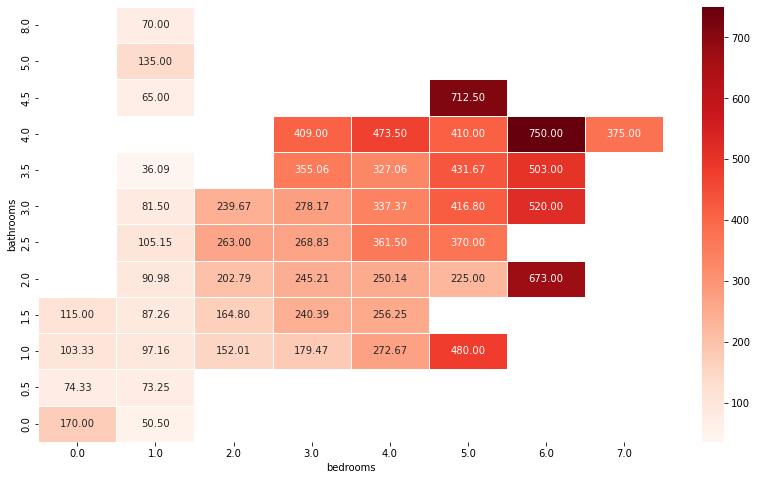

In [16]:
plt.figure(figsize = (14, 8))
sns.heatmap(listing
            .groupby(['bathrooms', 'bedrooms'])
            .mean()['price']
            .reset_index()
            .pivot('bathrooms', 'bedrooms', 'price')
            .sort_index(ascending = False),
            cmap = 'Reds', 
            fmt = '.2f',
            annot = True,
            linewidths = 0.5)

At first glance, we can see that the more bedrooms and bathrooms, the higher the listing prices. But if we compare the mean prices between 0-bedroom and 1-bedroom listings, we can see that 0-bedroom listings have higher mean price. It might be related to an experience in the nature (sea, forest, etc.), on which people are willing to pay higher than the "normal" listings.

### 5. What are the most common amenities across listings and which ones usually exist in the most expensive listings?

In [15]:
listing['amenities']

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5       {"Wireless Internet","Free Parking on Premises...
6       {"Wireless Internet","Free Parking on Premises...
7       {"Wireless Internet","Pets live on this proper...
8       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
9       {TV,Internet,"Wireless Internet",Kitchen,"Free...
10      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
11      {TV,"Cable TV","Wireless Internet",Kitchen,"Fr...
12      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
13      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
14      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
15      {TV,"Cable TV",Internet,Kitchen,"Free Parking ...
16      {Internet,"Wireless Internet","Pets Allowed",B...
17      {"Wire

In [16]:
listing['amenities'] = (listing['amenities']
                        .map(lambda am: '|'.join([a.replace('}', '').replace('{', '').replace('"', '') for a in am.split(',')]))
                       )
listing['amenities']

0       TV|Cable TV|Internet|Wireless Internet|Air Con...
1       TV|Internet|Wireless Internet|Kitchen|Free Par...
2       TV|Cable TV|Internet|Wireless Internet|Air Con...
3       Internet|Wireless Internet|Kitchen|Indoor Fire...
4       TV|Cable TV|Internet|Wireless Internet|Kitchen...
5       Wireless Internet|Free Parking on Premises|Hea...
6       Wireless Internet|Free Parking on Premises|Hea...
7       Wireless Internet|Pets live on this property|D...
8       TV|Cable TV|Internet|Wireless Internet|Kitchen...
9       TV|Internet|Wireless Internet|Kitchen|Free Par...
10      TV|Cable TV|Internet|Wireless Internet|Kitchen...
11      TV|Cable TV|Wireless Internet|Kitchen|Free Par...
12      TV|Cable TV|Internet|Wireless Internet|Kitchen...
13      TV|Cable TV|Internet|Wireless Internet|Kitchen...
14      TV|Cable TV|Internet|Wireless Internet|Kitchen...
15      TV|Cable TV|Internet|Kitchen|Free Parking on P...
16      Internet|Wireless Internet|Pets Allowed|Breakf...
17      Wirele

In [17]:
amenities = pd.Series(np.concatenate(listing['amenities'].map(lambda a: a.split('|'))))
amenities = amenities[amenities != '']
amenities

0                                TV
1                          Cable TV
2                          Internet
3                 Wireless Internet
4                  Air Conditioning
5                           Kitchen
6                           Heating
7               Family/Kid Friendly
8                            Washer
9                             Dryer
10                               TV
11                         Internet
12                Wireless Internet
13                          Kitchen
14         Free Parking on Premises
15         Buzzer/Wireless Intercom
16                          Heating
17              Family/Kid Friendly
18                           Washer
19                            Dryer
20                   Smoke Detector
21         Carbon Monoxide Detector
22                    First Aid Kit
23                      Safety Card
24                Fire Extinguisher
25                       Essentials
26                               TV
27                         C

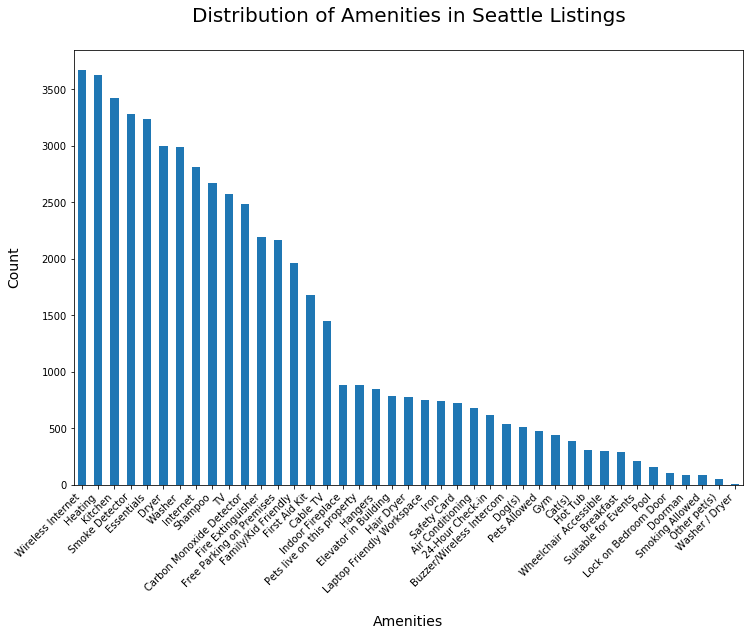

In [18]:
plt.figure(figsize = (12, 8))
amenities.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count\n', fontsize = 14)
plt.xlabel('\nAmenities', fontsize = 14)
plt.title('Distribution of Amenities in Seattle Listings\n', fontsize = 20)

We can see that the top 3 most common amenities across listings are `Wireless Internet`, `Heating`, and `Kitchen`.

In [19]:
amenities = np.unique(amenities)
amenity_prices = [(a, listing[listing['amenities'].map(lambda am: a in am)]['price'].mean()) for a in amenities]
amenity_prices

[('24-Hour Check-in', 131.5681818181818),
 ('Air Conditioning', 153.29689807976365),
 ('Breakfast', 95.62886597938144),
 ('Buzzer/Wireless Intercom', 136.37546468401487),
 ('Cable TV', 155.40318118948824),
 ('Carbon Monoxide Detector', 131.43661971830986),
 ('Cat(s)', 102.98429319371728),
 ('Dog(s)', 117.62082514734774),
 ('Doorman', 200.25882352941176),
 ('Dryer', 132.62331406551058),
 ('Elevator in Building', 144.58853503184713),
 ('Essentials', 127.22489959839358),
 ('Family/Kid Friendly', 150.7748344370861),
 ('Fire Extinguisher', 131.96584699453553),
 ('First Aid Kit', 128.27857142857144),
 ('Free Parking on Premises', 134.2307337332718),
 ('Gym', 156.34615384615384),
 ('Hair Dryer', 131.28682170542635),
 ('Hangers', 127.75531914893617),
 ('Heating', 128.3300248138958),
 ('Hot Tub', 167.02970297029702),
 ('Indoor Fireplace', 152.34762979683973),
 ('Internet', 128.3740520043337),
 ('Iron', 133.03504043126685),
 ('Kitchen', 131.8086473853345),
 ('Laptop Friendly Workspace', 129.8093

In [20]:
amenity_srs = pd.Series(data = [a[1] for a in amenity_prices], index = [a[0] for a in amenity_prices])
amenity_srs

24-Hour Check-in              131.568182
Air Conditioning              153.296898
Breakfast                      95.628866
Buzzer/Wireless Intercom      136.375465
Cable TV                      155.403181
Carbon Monoxide Detector      131.436620
Cat(s)                        102.984293
Dog(s)                        117.620825
Doorman                       200.258824
Dryer                         132.623314
Elevator in Building          144.588535
Essentials                    127.224900
Family/Kid Friendly           150.774834
Fire Extinguisher             131.965847
First Aid Kit                 128.278571
Free Parking on Premises      134.230734
Gym                           156.346154
Hair Dryer                    131.286822
Hangers                       127.755319
Heating                       128.330025
Hot Tub                       167.029703
Indoor Fireplace              152.347630
Internet                      128.374052
Iron                          133.035040
Kitchen         

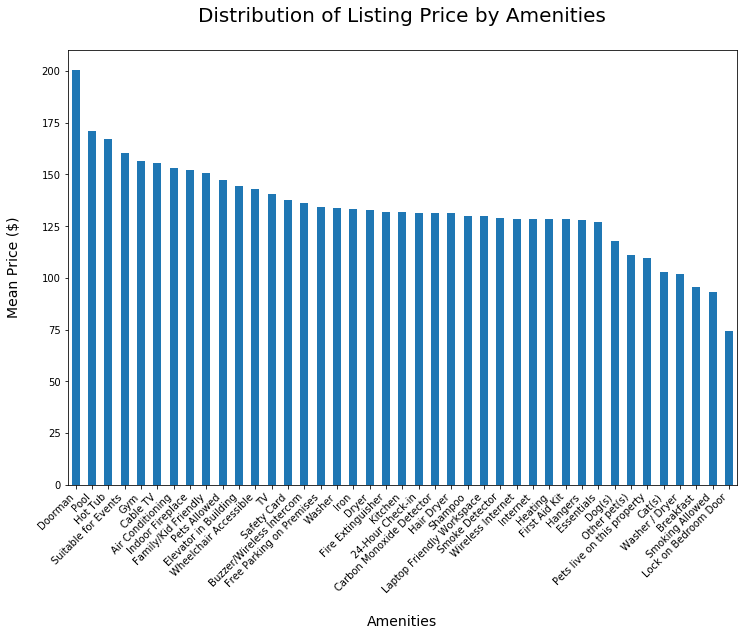

In [21]:
plt.figure(figsize = (12, 8))
amenity_srs.sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('\nAmenities', fontsize = 14)
plt.ylabel('Mean Price ($)\n', fontsize = 14)
plt.title('Distribution of Listing Price by Amenities\n', fontsize = 20)

We can see that the most common amenities in expensive listings are `Doorman`, `Pool`, and `Hot Tub`.